# Decision tree regression from scratch over Breast Cancer Dataset
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Cancer) has two or more branches (e.g., Benign and Malignant), each representing values for the attribute tested. Leaf node (e.g., Radius Mean,Texture Mean) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.
# ----------------------------------------------------------------------------------------------------------
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

# ----------------------------------------------------------------------------------------------------------
## Decision Tree Regression
The Regression class is made for  the regression of the data usin decision tree. This is a blue print class which contain all the function for the use to use and interact with easily.
#### Fit Function
#### Predict Function
#### Mean Square Error :
#### Mean Absolute Error

In [2]:
class Decision_tree_regression:
    def fit(self,training_data,training_label,min_leaf=5):
        print("\nTraining Start\n")
        self.dtree = Node(training_data,training_label,np.array(np.arange(len(training_label))),min_leaf)
        print("\nTraining Finish\n")
        return self
    
    def predict(self,training_data):
        return self.dtree.predict(training_data.values)
    
    
    def mse(self,actual,predicted):
        return self.dtree.mse(actual,predicted)
    
    # Calculate mean absolute error
    def mae_metric(self,actual, predicted):
        return self.dtree.mae_metric(actual,predicted)

# ----------------------------------------------------------------------------------------------------------
## Node Class
Node Class is made to grow the tree. we use recursive nature of the function to grow tree. The class has a function for finding the split value. through the split value we know that how the tree is grow and converse to predict value
### ------------------------------------------------------------------------------------------------------------------------------------------------------
### Fit Function
Fit Functin is the main regression function. It use to grow tree and do the regression by dividing the feature over a split value.
### ------------------------------------------------------------------------------------------------------------------------------------------------------
### Predict Function
Predict Function return the predicted value from the regressor model. 
### ------------------------------------------------------------------------------------------------------------------------------------------------------
### Split Value Function
Split Value function is the function of classifier(Gini Impurity Function). But Unlike Gini function it does not compare value it only take the average of the value and split the feature accordingly.
##### Formula :
$$\sum{\mathbf{rhs}} < \mathbf{leaf}_\mathbf{min}$$ 
$$or$$
$$\sum{\mathbf{lhs}} < \mathbf{leaf}_\mathbf{max}$$
$$\mathbf{S}_{\mathbf{i}}{(Y)} = \sqrt{\frac{\sum\left(\mathbf{Y}_{\mathbf{i}} - \mu\right)^{\mathbf{2}}}{\mathbf{N}}}$$
<br>
$$here$$
$$\mathbf{S}_{\mathbf{i}}{(Y)} = \mathbf{Score}$$
### ------------------------------------------------------------------------------------------------------------------------------------------------------
### Mean Square Error :
Mean Square Error (MSE). It is the standard deviation of how far from the regression line data points are. In other words, it tells you how concentrated the data is around the line of best fit.
##### Formula :
$$\mathbf{MSE} = \left(\frac{\mathbf{1}}{\mathbf{m}}\right)\sum_{\mathbf{i=0}}^{\mathbf{m}}\left(\mathbf{y}^{(\mathbf{i})}-\mathbf{h}\left(\mathbf{x}^{(\mathbf{i})}\right)^{\mathbf{2}}\right)$$
### ------------------------------------------------------------------------------------------------------------------------------------------------------
### Mean Absolute Error :
Mean Absolute Error (MAE). It is the absolute standard deviation of how far from the regression line data points are.

In [3]:
class Node:

    def __init__(self, x, y, idxs, min_leaf=5):
        print("Training......!!!!")
        clear_output(wait=True)
        self.x = x 
        self.y = y
        self.idxs = idxs 
        self.min_leaf = min_leaf
        self.row_count = len(idxs)
        self.col_count = x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
    
    def find_varsplit(self):
        for c in range(self.col_count): self.find_better_split(c)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x <= self.split)[0]
        rhs = np.nonzero(x > self.split)[0]
        self.lhs = Node(self.x, self.y, self.idxs[lhs], self.min_leaf)
        self.rhs = Node(self.x, self.y, self.idxs[rhs], self.min_leaf)
    
    def find_better_split(self, var_idx):
        x = self.x.values[self.idxs, var_idx]

        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            if rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf: 
                continue

            curr_score = self.find_score(lhs, rhs)
            if curr_score < self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]

    def find_score(self, lhs, rhs):
        y = self.y[self.idxs]
        lhs_std = y[lhs].std()
        rhs_std = y[rhs].std()
        return lhs_std * lhs.sum() + rhs_std * rhs.sum()
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf')
    
    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)
    
    def mse(self,actual, predicted):
        sum_error = 0.0
        for i in range(len(actual)):
            prediction_error = predicted[i] - actual[i]
            sum_error += (prediction_error ** 2)
        mean_error = (sum_error / float(len(actual)))
        return mean_error
    
    # Calculate mean absolute error
    def mae_metric(self,actual, predicted):
        sum_error = 0.0
        for i in range(len(actual)):
            sum_error += abs(predicted[i] - actual[i])
        return sum_error / float(len(actual))

# ----------------------------------------------------------------------------------------------------------
## Mean Square & Mean Absolute Error
Function returns the value error in the training of the model while predicting the target variable.<br>
##### Mean Square Error :
Mean Square Error (MSE). It is the standard deviation of how far from the regression line data points are. In other words, it tells you how concentrated the data is around the line of best fit.
##### Mean Absolute Error :
Mean Absolute Error (MAE). It is the absolute standard deviation of how far from the regression line data points are.

In [4]:
def mean_square_error(model,test_data,test_label):
    predict = model.predict(test_data)
    mse = model.mse(test_label,predict)
    mae = model.mae_metric(test_label,predict)
    return mse,mae

# ----------------------------------------------------------------------------------------------------------
### Calling Data
Data is call for work. The Columns are selected here is according to the BREAST CANCER DATASET from WINCONSIN Hospital Easily find on Kaggle(www.kaggle.com).

In [5]:
data = pd.read_csv('Breast_Cancer_Data.csv')

Removing unnecessary columns from the dataset so that you won't face any trouble regarding the dataset. I use Breast Cancer Dataset to train model and predict whether the person is having cancer or not.

In [6]:
data.drop([data.columns[0],data.columns[32]],axis=1,inplace=True)
data.replace(['B','M'],[0,1],inplace=True)

Preprocessing Data

In [7]:
x = data.iloc[:,1:2]
y = data['diagnosis']

### Regression Fitting

In [8]:
regressor = Decision_tree_regression()
regressor.fit(x,y)


Training Finish



### Mean Square & Mean Absolute Error

In [9]:
mse,mae = mean_square_error(regressor,x,y)
print("Mean Square Error in Data : {}\nMean Absolute Error in Data : {}".format(mse,mae))

Mean Square Error in Data : 0.06727829386001616
Mean Absolute Error in Data : 0.13455658772003246


### Ploting Regression Curve

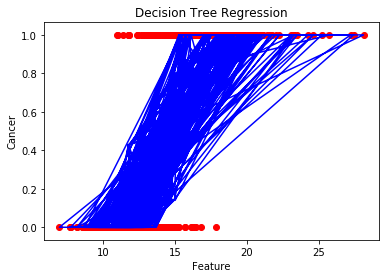

In [10]:
plt.scatter(x,y,color='red')
plt.plot(x,regressor.predict(x),color='blue')
plt.title('Decision Tree Regression')
plt.xlabel('Feature')
plt.ylabel('Cancer')
plt.show()